In [1]:
import pandas as pd
import numpy as np

In [2]:
torah = pd.read_csv("Torah_Verses.csv")[['0']]

from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/solomon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/solomon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
torah_words = [sentence for sentence in torah['0']]
twograms =list(ngrams(word_tokenize(torah_words[0]), 2))
twograms_words = [ngram[0]+ ngram[1] for ngram in twograms]

In [17]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['thy', 'thou', 'unto'])

tf_vectorizer = CountVectorizer(stop_words = stopwords, ngram_range=(2,2))
chapters_tf = tf_vectorizer.fit_transform(torah_words)
ch_tf= pd.DataFrame(chapters_tf.toarray(),columns=tf_vectorizer.get_feature_names())

/home/solomon/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [18]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
chapters_tfidf = tfidf_vectorizer.fit_transform(torah_words)
ch_tfidf = pd.DataFrame(chapters_tfidf.toarray(),columns=tfidf_vectorizer.get_feature_names())

/home/solomon/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/solomon/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:1796: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


In [19]:
components = 6
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components=components, random_state=0)
lda_tf.fit(ch_tf)

# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=components, random_state=0)
lda_tfidf.fit(ch_tfidf)

/home/solomon/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=6, random_state=0)

In [20]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_tfidf, chapters_tfidf, tfidf_vectorizer)

/home/solomon/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.064108  0.000189       1        1  18.569288
3      0.013475  0.051558       2        1  17.954232
2      0.014723 -0.010915       3        1  16.502175
1      0.014976 -0.004924       4        1  16.058546
0      0.013631 -0.029386       5        1  15.655528
5      0.007303 -0.006522       6        1  15.260231, topic_info=                          Term       Freq      Total Category  logprob  \
11586               lord spake  19.000000  19.000000  Default  30.0000   
19045              spake moses  18.000000  18.000000  Default  29.0000   
13006             moses saying  16.000000  16.000000  Default  28.0000   
68                aaron saying   3.000000   3.000000  Default  27.0000   
1896               blue purple   2.000000   2.000000  Default  26.0000   
...                        ...        ...        ...      ...      ...   
12901              moses aaron   0.892910   6.803327   Topic6  -7.6706   
13002               moses said   0.809240   4.934369   Topic6  -7.7690   
17805               shall take   0.756070   4.035320   Topic6  -7.8369   
19611  tabernacle congregation   0.774612   6.669612   Topic6  -7.8127   
2603            burnt offering   0.744488   5.004104   Topic6  -7.8524   

       loglift  
11586  30.0000  
19045  29.0000  
13006  28.0000  
68     27.0000  
1896   26.0000  
...        ...  
12901  -0.1508  
13002   0.0720  
17805   0.2052  
19611  -0.2730  
2603   -0.0254  

[382 rows x 6 columns], token_table=       Topic      Freq          Term
term                                
40         2  1.137031    aaron lord
68         1  0.937398  aaron saying
72         1  0.278175    aaron sons
72         3  0.278175    aaron sons
72         5  0.278175    aaron sons
...      ...       ...           ...
23199      6  0.193942      ye shall
23275      1  0.705317  year without
23281      1  0.409832   years begat
23281      5  0.409832   years begat
23281      6  0.409832   years begat

[351 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 2, 1, 6])

/home/solomon/anaconda3/envs/metis/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<AxesSubplot:>

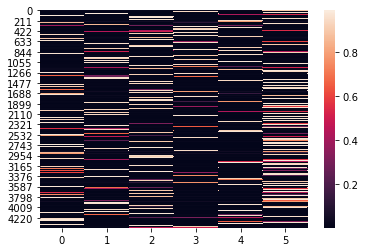

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(lda_tf.transform(ch_tf))